# Amasando los datos

El objetivo de este módulo es aprender a cargar datos, limpiarlos, y manipularlos. Es decir, cargar un archivo de texto básico, y aprender a hacer operaciones básicas (estádisticas), unir dos fuentes de datos, y operaciones mas complejas como el concepto de `split-apply-combine`. 

Para esto, usaremos una estructura llamada *Dataframe*.  Esta es la estructura básica de los paquetes para manejo de datos, para casi todos los lenguajes o software, y las instrucciones son muy similares entre unos y otros.  

En Python, esto está incorporado dentro del paquete `Panda`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Panda tiene un nuevo tipo para almacenar datos, las `Series` que corresponden a una **columna** de datos, y los `Dataframe`, que son varias columnas de datos con los mismo indices.   

Primero cargamos los datos (Ojo, los datos vienen con un registro "NA" para aquellos que no son validos):

In [ ]:
dataTrips = pd.read_csv("trips_new.csv")

Cada columna es una serie de datos. Podemos pedir una columna específica usado dataframe.columna o dataframe['columna']

In [ ]:
dataTrips['duration'].values
dataTrips['duration'].index



Las series de datos pueden operarse como vectores:

In [ ]:
dataTrips['duration'] *100000
dataTrips['duration']*dataTrips['duration']
dataTrips['duration'] >100

Y estas funciones también aplican a los Dataframes

Podemos agregar una columna con un valor dado (o una lista)

In [ ]:
dataTrips['test'] = 12
dataTrips

y borrarlas

In [ ]:
del dataTrips['test']
dataTrips

También podemos pedir un subconjunto de elementos, como si fuera una matriz. Por ejemplo, las 10 primeras filas.

In [ ]:
dataTrips.iloc[1:10]

O las filas que cumplen con una condición. Por ejemplo, los viajes de la bicicleta B00468.

In [ ]:
dataTrips['bike_nr']=='B00468'

Y seleccionar solo las filas que cumplen esa condicion

In [ ]:
dataTrips[dataTrips['bike_nr']=='B00468']

Podemos ver el numero de registros y columnas del DataFrame (`.shape`)

In [ ]:
dataTrips.shape

Un aspecto clave de los DataFrame es que cada columna tiene un *typo* (`dtype` en Python) asociado.

In [ ]:
dataTrips.dtypes

Cambiaremos las columnas a *categorias*. Por ejemplo, la columna *gender* tiene dos categorías: *Male* y *Female* (o `NaN` si no se conoce)

In [ ]:
dataTrips['gender'] = dataTrips['gender'].astype('category')

In [ ]:
dataTrips['gender']

Posiblemente al leer también tiene errores. Por ejemplo, la estación de inicio la reconoció como un número (*float*). Lo corregimos como categoría.

In [ ]:
dataTrips['start_station']=dataTrips['start_station'].astype('category')
dataTrips['end_station']=dataTrips['end_station'].astype('category')

In [ ]:
dataTrips['start_station']

Otras columnas (como *start_date* y *end_date*) son del tipo Fecha.

In [ ]:
dataTrips['start_date']=dataTrips['start_date'].astype('datetime64[ns]')
dataTrips['end_date']=dataTrips['end_date'].astype('datetime64[ns]')

In [ ]:
dataTrips['subscription_type']=dataTrips['subscription_type'].astype('category')
dataTrips['zip_code']=dataTrips['zip_code'].astype('category')
dataTrips['bike_nr']=dataTrips['bike_nr'].astype('category')

In [ ]:
dataTrips.dtypes

Y, por ejemplo, las duraciones deberían ser `float`

In [ ]:
dataTrips['duration']=dataTrips['duration'].astype('float')

In [ ]:
dataTrips.dtypes

In [ ]:
dataTrips['bike_nr'].describe()

Ahora, transformemos las duraciones (que están en segundos) en minutos.

In [ ]:
dataTrips['duration']/60
dataTrips['duration']=dataTrips['duration']/60

In [ ]:
dataTrips.describe()

Funciones cualquiera pueden ser aplicadas a cada elemento con la función `.apply(<funcion>)`

In [ ]:
def cuadrado(x):
    return x*x

In [ ]:
dataTrips['duration'].apply(cuadrado)

In [ ]:
dataTrips['duration'].apply(lambda x: x**2)

Fijemonos que tenemos varias columnas con datos faltantes.  Algunos no son importantes (*zip_code*, *birth_date* para los usuarios no registrados) pero otros pueden ser errores (*start_station* y *end_station*).  Podemos eliminar las final con datos faltantes `NaN` usando las manipulaciones anteriores.

Por ejemplo, podemos ver si un dato es `NaN` o no, con el comando `isna()`.  Esto hay que aplicarlo sobre ***CADA*** registro de la columna, y con eso podemos filtrar los datos que queremos.

In [ ]:
dataTrips['start_station'].isna()

In [ ]:
finalData=dataTrips.dropna(subset=['start_station', 'end_station'])

In [ ]:
finalData

In [ ]:
finalData.shape

Analicemos ahora las duraciones. Hagamos un histograma de sus valores:

In [ ]:
plt.hist(finalData['duration'], bins=100)
plt.show()

In [ ]:
finalData['duration'].describe()

¿Que pasó?  Hay outliers en los datos... Limitemonos entonces a aquellos datos con duraciones menores a 1 dia.

In [ ]:
finalData['duration']> 24*60

In [ ]:
finalData[finalData['duration']<24*60]['duration']

In [ ]:
plt.hist(finalData[finalData['duration']<24*60]['duration'], bins=100)
plt.show()

Mas razonable. Actualicemos los datos solo a aquellos viajes que duran menos de 24 horas.

In [ ]:
finalData = finalData[finalData['duration']<24*60]
finalData

Usemos las fechas. Estas pertenecen al tipo `DateTime`, por lo que podemos hacerles preguntas a ese registro, como el día de la semana de cada fecha, o el mes, etc.   <br>

Partamos analizando las fechas en que se realizan los viajes, y los dias de semana que corresponden.

In [ ]:
finalData['start_date'].dt.day_name()
finalData['start_date'].dt.dayofweek

In [ ]:
plt.hist(finalData['start_date'].dt.dayofweek, bins=7)
plt.show()

In [ ]:
plt.hist(finalData['start_date'].dt.month, bins=range(1,13))
plt.show()

In [ ]:
plt.hist(finalData['start_date'].dt.hour, bins=range(24))
plt.show()

Tambien podemos agregar una columna a la tabla. Por ejemplo, agreguemos el mes de cada viaje

In [ ]:
finalData['start_month'] = finalData['start_date'].dt.month
finalData

# Analizando los datos. 
 Ok, tenemos los datos ya limpios. Esto es generalmente muy tedioso,
 pero vimos que tenemos herramientas para poder hacerlo de forma un 
 poco mas sencilla. 
  Ahora queremos empezar a hacer algunos análisis. Para esto, utilizaremos
 algunas funciones propias de los `Dataframes`:

La estructura de datos de cada columna permite aplicar algunas funciones "agregadoras" básicas, por ejemplo, ver promedio `.mean()`, contar `.count()`, sumar `.sum()`, mínimo `.min()`, máximo `.max()`, etc.

In [ ]:
finalData['duration'].mean()

Pero: ¿si quisieramos tener la duración promedio por género?  Esto implica que deberíamos **separar** el conjunto en  grupos (uno por cada género), **aplicar** la función (`.mean()` en este caso) y **combinar** los resultados en una tabla final.

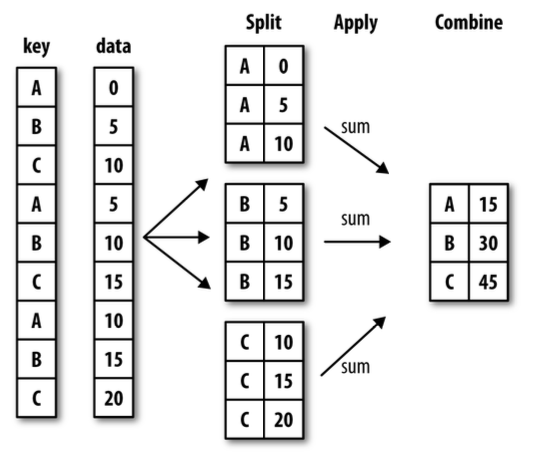

Este concepto, conocido como `split-apply-combine` es clave en el análisis de datos. En Panda, esto se hace con el comando `.groupby(<como agrupar>)`

In [ ]:
finalData.groupby('gender')

In [ ]:
finalData.groupby('gender')['duration'].mean()

Podemos agrupar por mas de una columna

In [ ]:
finalData.groupby(['subscription_type','gender'])['duration'].mean()

O incluso por una columna externa.

In [ ]:
tmp=finalData['birth_date']>1980
tmp

In [ ]:
finalData.groupby(tmp)['duration'].mean()

**Pregunta**: ¿Cuál es la duración promedio de los viajes para cada tipo de suscriptor?

**PREGUNTA 1**: ¿Cual es la duración promedio por género?

**PREGUNTA 2**: ¿Cual es el total de minutos por género?

**PREGUNTA 3**: ¿Cuál es la duración promedio para cada día de la semana? (usemos la fecha de inicio del viaje)

**PREGUNTA 4**: ¿Cuál es la duración promedio para cada mes del año? (usemos la fecha de término del viaje)

**Pregunta**: ¿Cuál es la proporción de usuarios `Casual` para cada estación de inicio? 

Otra opción es que nosotros hagamos una función que entregue esta proporción. Por ejemplo:

**Ejercicio**: La empresa tiene una tarifa distinta para aquellos viajes que duran mas de media hora.   Por eso, Calcule la proporción de viajes desde cada estación de inicio (*start_station*) que duran mas de 30 minutos. 

Supongamos ahora que queremos rescatar los dos días mas utilizados, por cada tipo de usuario, o por estación. Esto requeriría crea una propia función, que nos entregue los dos dias. Pero esto sabemos hacerlo!


In [ ]:
finalData['start_day_name'] = finalData['start_date'].dt.day_name()
finalData

In [ ]:
resumenDias = finalData.groupby('start_day_name')['start_day_name'].count()

In [ ]:
resumenDias.sort_values(ascending=False).index

In [ ]:
list(resumenDias.sort_values(ascending=False).index[1:3])

Pomgamos todo esto en una función:

In [ ]:
def best2days(x):
    resumenDias = x.groupby('start_day_name')['start_day_name'].count()
    return list(resumenDias.sort_values(ascending=False).index[1:3])

In [ ]:
best2days(finalData)

In [ ]:
finalData.groupby('subscription_type').apply(best2days)

**Ejercicio (BONUS):** encuentre el tipo de suscripción más común para cada estación de partida.   

Podemos hacer que retorne un DataFrame, de esta forma el resultado será la union de todos estos dataframe, generando una nueva tabla

Cree un nuevo `DataFrame` de bicicletas, donde cada fila tenga:
- El id de cada bicicleta `bike_nr`
- la duración promedio de cada bicicleta
- la desviación estándar de las duraciones de cada bicicleta
- el número de viajes realizados en cada bicicleta

Para esto, podemos hacer que el resultado de la función a aplicar sobre cada grupo sea un `Dataframe`, por lo que al combinarlo tendremos el dataframe pedido.   Para definir un DataFrame usamos el comando `DataFrame`:
```
DataFrame(numeroFilas = nrow(finalData), duracion_promedio = mean(finalData[:duration]))
```

In [ ]:
def statsBike(x):
    prom = x['duration'].mean()
    dev = x['duration'].std()
    num = x['duration'].count()
    return [prom,dev,num]
#    return pd.DataFrame({'mean_duration': [prom], 'stddev_duration': [dev], 'num_trips': [num]})

In [ ]:
statsBike(finalData)

In [ ]:
finalData.groupby('bike_nr').apply(statsBike)

**Ejercicio (BONUS)**: Incluya las siguientes variables para cada fila:
- número de viajes que parten y terminan en un día diferente
- estación mas común de inicio de un viaje 
- estación mas común de término de un viaje